In [1]:
import pandas as pd
import time
from pandarallel import pandarallel
import math
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import swifter
import perfplot
import matplotlib.pyplot as plt
import psutil

In [3]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


 67%|██████▋   | 2/3 [00:01<00:00,  1.21it/s]


 33%|███▎      | 1/3 [00:01<00:02,  1.05s/it]


 67%|██████▋   | 2/3 [00:02<00:01,  1.05s/it]


 33%|███▎      | 1/3 [00:00<00:01,  1.22it/s]


 67%|██████▋   | 2/3 [00:01<00:00,  1.10it/s]


 12%|█▏        | 3/25 [00:08<01:02,  2.85s/it][A


 67%|██████▋   | 2/3 [00:01<00:00,  1.16it/s]


100%|██████████| 3/3 [00:02<00:00,  1.13it/s]
                                             

 67%|██████▋   | 2/3 [00:01<00:00,  1.07it/s]


100%|██████████| 3/3 [00:03<00:00,  1.03it/s]


 67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]

 67%|██████▋   | 2/3 [00:01<00:00,  1.10it/s]


100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


 67%|██████▋   | 2/3 [00:01<00:00,  1.11it/s]

 67%|██████▋   | 2/3 [00:01<00:00,  1.13it/s]


100%|██████████| 3/3 [00:03<00:00,  1.07it/s]


 67%|██████▋   | 2/3 [00:02<00:00,  1.02it/s]


100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


 67%|██████▋   | 2/3 [00:02<00:01,  1.07s/it]


 44%|████▍     | 11/25 [00:33<00:44,  3.21s/it]A


 67%|██████▋   | 2/3 [00:02<00:01,  1.16s/it]

 67%|██████▋   | 2/3 [00:02<00:01,  1.21s/it]

 67%|██████▋   | 2/3 [00:02<00:01,  1.27s/it]


 56%|█████▌    | 14/25 [00:45<00:41,  3.79s/it]A


 67%|██████▋   | 2/3 [00:02<00:01,  1.52s/it]


 60%|██████    | 15/25 [00:51<00:44,  4.42s/it]A


 67%|██████▋   | 2/3 [00:04<00:02,  2.81s/it]


 64%|██████▍   | 16/25 [01:05<01:05,  7.29s/it]A


 67%|██████▋   | 2/3 [00:08<00:05,  5.25s/it]


 68%|██████▊   | 17/25 [01:26<01:30, 11.36s/it]A


 67%|██████▋   | 2/3 [00:15<00:09,  9.76s/it]


 72%|███████▏  | 18/25 [01:56<01:59, 17.00s/it]A


 67%|██████▋   | 2/3 [00:30<00:19, 19.52s/it]


 76%|███████▌  | 19/25 [02:49<02:46, 27.77s/it]A


 67%|██████▋   | 2/3 [01:01<00:39, 39.31s/it]


 80%|████████  | 20/25 [04:30<04:08, 49.61s/it]A


 67%|██████▋   | 2/3 [02:04<01:19, 79.33s/it] 


 84%|████████▍ | 21/25 [07:57<06:27, 96.89s/it]A


 67%|██████▋   | 2/3 [04:17<02:40, 160.92s/it]


 88%|████████▊ | 22/25 [14:37<09:23, 187.76s/it]A


 67%|██████▋   | 2/3 [08:37<05:22, 322.82s/it]


 92%|█████████▏| 23/25 [27:34<12:09, 364.68s/it]A


 67%|██████▋   | 2/3 [16:31<10:23, 623.90s/it]


 96%|█████████▌| 24/25 [52:19<11:40, 700.81s/it]A


 67%|██████▋   | 2/3 [34:13<21:23, 1283.02s/it]


100%|██████████| 3/3 [41:29<00:00, 1028.84s/it]

100%|██████████| 25/25 [1:42:52<00:00, 246.92s/it] 


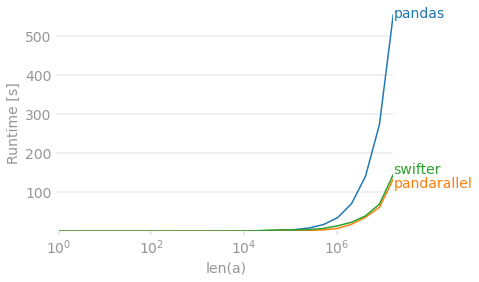

In [6]:
import math
def func(x):
    return math.sin(x.a**2) + math.sin(x.b**2)

perfplot.show(
    setup=lambda df_size: pd.DataFrame(dict(a=np.random.randint(1, 8, df_size), b=np.random.rand(df_size))),
    kernels=[
        lambda df: df.apply(func, axis=1),
        lambda df: df.parallel_apply(func, axis=1),
        lambda df: df.swifter.apply(func, axis=1)
    ],
    labels=["pandas", "pandarallel", "swifter"],
    n_range=[2 ** k for k in range(25)],
    xlabel="len(a)",
    logy=False
)